<a href="https://colab.research.google.com/github/Saivkumar/SaivKumar/blob/main/Brain_Cancer_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Essential Libraries for TSNE**

In [1]:
%%capture
!pip install bioinfokit

In [20]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster
import seaborn as sns

**Loading Dataset**

In [4]:
df=pd.read_csv('/content/Brain Cancer.zip')

In [5]:
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


Above dataset can be used in predicting Brain Cancer type based on expression levels of specific genes or probes. These features are used as inputs to the model to predict the Brain Cancer Type

Droping Useless Column

In [6]:
df1=df.drop('samples',axis=1)

In [7]:
df1

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


Changing Object Column 'type' to integer through One Hot Encoding

In [11]:
df2=pd.get_dummies(df1,columns=['type'],dtype=int)

In [12]:
df2

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type_ependymoma,type_glioblastoma,type_medulloblastoma,type_normal,type_pilocytic_astrocytoma
0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,5.898355,5.513410,...,4.870548,4.047380,3.721936,4.516434,4.749940,1,0,0,0,0
1,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,5.453147,6.173106,...,4.895315,3.786437,3.564481,4.430891,4.491416,1,0,0,0,0
2,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,8.400266,6.323471,...,5.052184,4.005343,3.595382,4.563494,4.668827,1,0,0,0,0
3,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,4.900380,6.008684,...,4.708371,3.892318,3.759429,4.748381,4.521275,1,0,0,0,0
4,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,5.405628,5.279579,...,4.773806,3.796856,3.577544,4.504385,4.541450,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,6.926720,4.967369,...,4.399176,3.878855,3.680103,4.726784,4.564637,0,0,0,0,1
126,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,6.157163,5.082896,...,4.912618,3.764800,3.664920,4.628355,4.761351,0,0,0,0,1
127,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,7.494852,4.919414,...,4.712895,3.913637,3.700964,4.764693,4.834952,0,0,0,0,1
128,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,6.296021,5.140635,...,4.739400,3.782980,3.920363,4.665584,4.613326,0,0,0,0,1


**Split-out validation dataset**

In [13]:
array = df2.values

**Separating Array into input and output Components**

In [14]:
X = array[:,:-5]
Y = array[:,-5:]

**TSNE Visualization**

In [15]:
#TSNE visualization
from bioinfokit.visuz import cluster


model = TSNE(2)
model.fit(X)
#data_tsne = model.transform(X)

data_tsne = TSNE(n_components=2).fit_transform(X)
cluster.tsneplot(score=data_tsne)

In [16]:
# get a list of categories
color_class = df2[['type_ependymoma','type_glioblastoma','type_medulloblastoma','type_normal','type_pilocytic_astrocytoma']].idxmax(axis=1).to_numpy()
cluster.tsneplot(score=data_tsne, colorlist=color_class, legendpos='upper right')
#Plot will be stored in the default directory

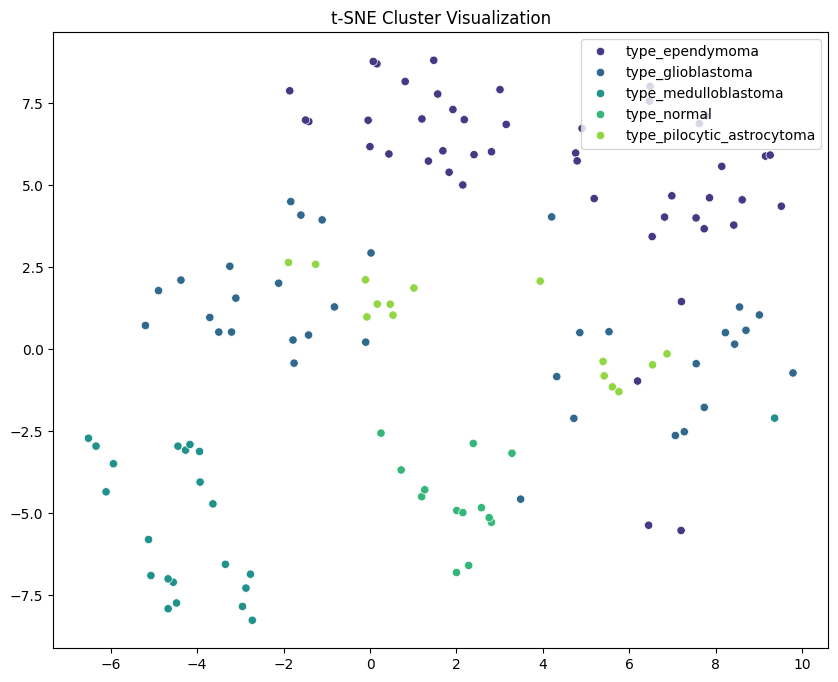

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=color_class, palette='viridis', legend='full')
plt.title('t-SNE Cluster Visualization')
plt.legend(loc='upper right')
plt.show()

In [23]:
data_tsne

array([[ 1.5994321e-01,  8.7093620e+00],
       [ 7.1975322e+00, -5.5230732e+00],
       [ 2.1471086e+00,  5.0145078e+00],
       [ 9.5163584e+00,  4.3668780e+00],
       [ 3.0073726e+00,  7.9225588e+00],
       [ 8.1358409e-01,  8.1699133e+00],
       [-1.4163086e+00,  6.9492059e+00],
       [-4.3617040e-02,  6.9885607e+00],
       [ 4.3735912e-01,  5.9598613e+00],
       [-1.2098709e-03,  6.1831465e+00],
       [ 6.9833350e+00,  4.6843686e+00],
       [-1.8573457e+00,  7.8865113e+00],
       [ 1.4750211e+00,  8.8173265e+00],
       [ 6.4793262e+00,  8.0229254e+00],
       [ 1.9180040e+00,  7.3157477e+00],
       [ 4.9055500e+00,  6.7387276e+00],
       [-1.4914402e+00,  6.9935923e+00],
       [ 1.6861490e+00,  6.0564861e+00],
       [ 4.7581139e+00,  5.9897447e+00],
       [ 2.1807361e+00,  7.0061731e+00],
       [ 1.8301322e+00,  5.4030843e+00],
       [ 3.1511772e+00,  6.8612103e+00],
       [ 6.4684749e+00,  7.5709162e+00],
       [ 4.7924633e+00,  5.7493505e+00],
       [ 1.35078